# Построение модели линейной одномерной регрессии

**Вариант:** 14

**Цель работы:** изучение принципов построения модели линейной одномерной регрессии.

**Задачи:**
* реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
* получение теоретических представлений о задаче регресии;
* получение навыков использования пайплайна при решении задачи машинного обучения;
* получение навыков рефакторинга кода в задачах машинного обучения.

# Продажа велосипедов

Мной был выбран набор данных под названием "Bikes rent" по ссылке https://www.kaggle.com/datasets/annatrofy/bikes-rent/data. 

Предскажем зависимость спроса на велосипеды (cnt) от температуры (temp) при помощи модели простой линейной регрессии. Построим прямую линию регрессии.

### Подключение библиотек

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [45]:
dataset = pd.read_csv('./datasets/bikes_rent.csv')
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [46]:
X = dataset.iloc[:, 7:8].values
y = dataset.iloc[:, 12].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[14.110847]
 [14.902598]
 [ 8.050924]
 [ 8.2     ]
 [ 9.305237]]
Зависимая переменная
[ 985  801 1349 1562 1600]


### Разделение выборки на тестовую и тренировочную

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

### Обучение линейной модели регрессии

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Предсказание, обработка и визуализация результатов

In [49]:
y_pred = regressor.predict(X_test)
print(y_pred)

[5766.52408142 6175.90654429 2836.18777293 2570.13732862 3536.45524381
 4279.81152301 4365.99560363 4252.87616984 4155.91665516 2643.20601889
 2260.99161202 3428.72029507 3683.06449397 5901.18791937 6154.36214013
 5432.55026509 5098.57644877 3843.49370696 3288.6655081  4110.24872374
 5895.80343432 2965.46712584 3391.01597179 5804.22840469 2378.32555272
 5437.93475014 6811.52787475 5572.60505206 4748.44917729 5098.57644877
 2222.11084664 5561.829618   4215.17184656 5820.38832381 3741.14324327
 3369.46510367 6348.28116949 6897.71841933 4010.47738314 4290.58049311
 5012.39236815 3677.44084212 5314.04634625 3961.9976258  5965.82759582
 4651.48966262 3092.87192813 5680.33353684 3035.49775131 2963.59257522
 5933.5077576  6122.04230191 4328.29128035 5567.21410304 5917.34783848
 4295.97144213 3428.72029507 4274.420574   6052.01167644 3046.2667214
 4732.28925818 3568.77508204 5357.13515457 5260.1756399  5222.47131662
 5200.92691246 4974.68804488 4737.67374323 5804.22840469 3638.79924354
 4597.6

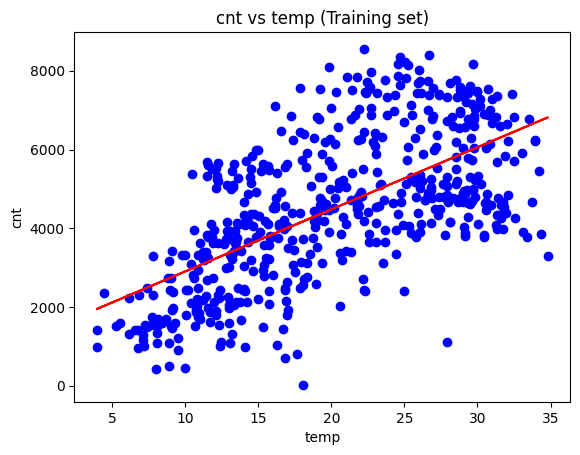

In [52]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('cnt vs temp (Training set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

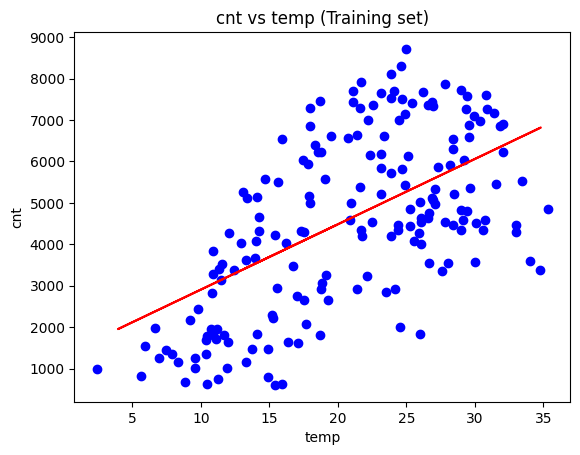

In [53]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('cnt vs temp (Training set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

### Использование модели

In [55]:
temp = [[30]]

regressor.predict(temp)

array([6057.66323371])

### Параметры модели

In [56]:
a = regressor.coef_
b = regressor.intercept_

In [57]:
temp = 30


cnt  = a * temp + b 
cnt

array([6057.66323371])

## Контольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

При реализации модели линейной регрессии нет необходимости выполнять масштабирование признаков, потому что эта модель основана на линейной комбинации признаков. Масштабирование признаков полезно в моделях, которые основаны на расстояниях или различиях между признаками, как, например, метод k-ближайших соседей (KNN) или метод опорных векторов (SVM). В случае линейной регрессии, коэффициенты регрессии адаптируются к значениям признаков, включая их масштаб, поэтому масштабирование не является обязательным.

2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?

Модель линейной регрессии использует квадратичное отклонение (Mean Squared Error, MSE) в качестве функции потерь, а не модуль отклонения (Mean Absolute Error, MAE), потому что квадратичное отклонение более подходит для задачи обучения с учителем и линейной регрессии. Квадратичное отклонение считает большие ошибки более пагубными, чем маленькие, и эта функция потерь имеет аналитическое решение, что делает ее вычисление более эффективным.

3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

Метод `fit(X, y)` класса LinearRegression реализует процесс обучения модели. Внутри метода выполняется нахождение оптимальных весов (коэффициентов) модели, которые минимизируют функцию потерь (как правило, MSE) на предоставленных обучающих данных `X` и соответствующих метках `y`. Модель подбирает коэффициенты так, чтобы аппроксимировать линейную зависимость между признаками и метками в данных.

4. Поясните назначение метода predict класса LinearRegression.

Метод `predict(X)` класса LinearRegression предназначен для выполнения прогнозов на новых данных. После обучения модели при помощи метода `fit`, вы можете использовать метод `predict` для предсказания значений целевой переменной на новых или тестовых данных, передавая их в качестве аргумента `X`. Модель применяет найденные веса к переданным данным и возвращает прогнозы.

5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Для оценки точности модели машинного обучения обычно используют тестовую выборку, а не тренировочную. Тестовая выборка представляет собой данные, которые модель ранее не видела, и, следовательно, оценка точности на тестовой выборке дает более объективную оценку способности модели к обобщению. Оценка точности на тренировочной выборке может дать завышенные результаты, так как модель уже знакома с этими данными. Тестовая выборка позволяет проверить, насколько хорошо модель обобщает знания, полученные на тренировочных данных, на новые, неизвестные данные.